In [71]:
import pandas as pd

priceNeo = pd.read_excel('NEO-PRICE.xlsx')
priceNeo
maxSATS = priceNeo['Price in SATS'].max()
minSATS = priceNeo['Price in SATS'].min()

In [68]:
maxSATS

0.02718621806

In [72]:
minSATS

1.192639058e-05

In [77]:
isMaxSATS = priceNeo['Price in SATS'] == maxSATS

In [78]:
maxSATSC = priceNeo[isMaxSATS]

In [79]:
maxSATSC

Date   Open*    High     Low  Close**        Volume  Market Cap  \
789 2018-01-16  187.97  187.97  104.29    145.3  1.664430e+09  9444435000   

     Averages  Price in SATS  Bitcoin Price  
789    146.13       0.027186        12019.0

In [49]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

bitcoinPrice = priceNeo[['Bitcoin Price']]
neoSATS = priceNeo[['Price in SATS']

In [50]:
bitcoinPrice

<bound method DataFrame.max of       Bitcoin Price
0          5502.970
1          5375.150
2          4972.550
3          6394.740
4          7796.810
...             ...
1279        609.055
1280        606.935
1281        614.665
1282        623.745
1283        623.545

[1284 rows x 1 columns]>

In [42]:
bitcoinPrice

Bitcoin Price
0          5502.970
1          5375.150
2          4972.550
3          6394.740
4          7796.810
...             ...
1279        609.055
1280        606.935
1281        614.665
1282        623.745
1283        623.545

[1284 rows x 1 columns]

In [32]:
est = sm.OLS(neoSATS, bitcoinPrice).fit()

In [33]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Price in SATS   R-squared (uncentered):                   0.602
Model:                            OLS   Adj. R-squared (uncentered):              0.602
Method:                 Least Squares   F-statistic:                              1941.
Date:                Mon, 16 Mar 2020   Prob (F-statistic):                   5.11e-259
Time:                        14:28:13   Log-Likelihood:                          5725.0
No. Observations:                1284   AIC:                                 -1.145e+04
Df Residuals:                    1283   BIC:                                 -1.144e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Bitcoin Price   4.92e-07   1.12e-08     44.062      0.000     4.7e-07    5.14e-07
==============================================================================
Omnibus:                      680.351   Durbin-Watson:                   0.228
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5187.891
Skew:                           2.368   Prob(JB):                         0.00
Kurtosis:                      11.634   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
predicted = est.predict(5502.970)
print(predicted)

[0.00270744]


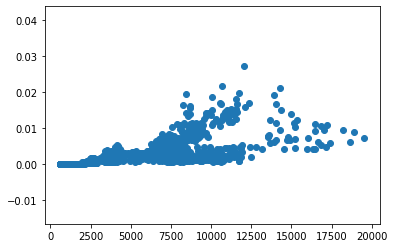

In [45]:
%matplotlib inline
from pylab import *
import numpy as np
scatter(bitcoinPrice,neoSATS)